Will and Shawn try coding

In [115]:
import numpy as np
import matplotlib.pyplot as plt



delta_t = .01
size = 200


def force(voltage, pos):
    return m*g - voltage/(pos[-1]**2)

def acceleration(accel):
    new = force(voltage, pos)/m
    accel = np.delete(accel, 0)
    return np.append(accel, new)

def velocity(vel, accel):
    new = accel[-1]*delta_t + vel[-1]
    vel = np.delete(vel, 0)
    return np.append(vel, new)

def position(pos, vel):
    new = vel[-1]*delta_t + pos[-1]
    pos = np.delete(pos, 0)
    return np.append(pos, new)

def time(t):
    new = t[-1] + delta_t
    t = np.delete(t, 0)
    return np.append(t, new)

def controller(target, pos):
    kp = 20
    error = (pos[-1] - target)
    return kp*error

<IPython.core.display.Javascript object>


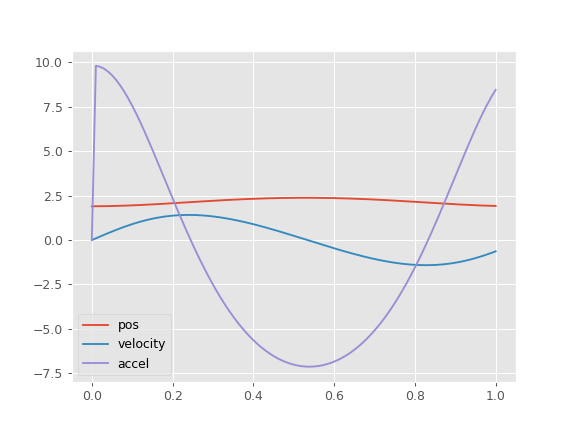

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

g = 9.81
m = .1
xi = 1.9
target = xi

pos = np.ones(size)*xi
vel = np.zeros(size)
accel = np.zeros(size)
t = np.zeros(size)

for i in range(200):
    voltage = controller(target, pos)
    accel = acceleration(accel)
    vel = velocity(vel, accel)
    pos = position(pos, vel)
    t = time(t)
    ax.clear()
    ax.plot(t, pos)
    ax.plot(t, vel)
    ax.plot(t, accel)
    ax.legend(["pos", "velocity", "accel"])
    fig.canvas.draw()